# Le traitement numérique des images

Cette page reprend
[l'article publié sur le site web Images des mathématiques](<http://images.math.cnrs.fr/Le-traitement-numerique-des-images.html).

Les appareils numériques photographient de manière très précise le monde
qui nous entoure. L'utilisateur souhaite pouvoir stocker avec un encombrement
minimal ses photos sur son disque dur. Il souhaite également pouvoir les retoucher
afin d'améliorer leur qualité. Cet article présente les outils mathématiques et
informatiques qui permettent d'effectuer ces différentes tâches.


Cet article présente quelques concepts du [traitement](http://fr.wikipedia.org/wiki/Traitement_d'images)
mathématique des
images numériques. Ces traitements permettent de stocker plus facilement
les images et d'améliorer leur qualité. Les mathématiques utilisées dans
cet article correspondent au niveau de la classe de troisième. Les mots
clés en rouge pointent vers les pages [Wikipédia](http://fr.wikipedia.org/)
correspondantes. Ils sont
repris à la fin de l'article dans un glossaire.

_Mot clefs :_ image, bits, carré, racine carrée, inverse, logarithme, moyenne, médiane.

*Important :* voir la [page d'installation](http://gpeyre.github.io/numerical-tours/installation_python/) pour les détails de l'installation des toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

In [1]:
library(imager)
library(png)
library(pracma)
library(SynchWave)

source("nt_toolbox/general.R")
source("nt_toolbox/signal.R")

Loading required package: plyr
Loading required package: magrittr

Attaching package: ‘imager’

The following object is masked from ‘package:magrittr’:

    add

The following object is masked from ‘package:plyr’:

    liply

The following objects are masked from ‘package:stats’:

    convolve, spectrum

The following object is masked from ‘package:graphics’:

    frame

The following object is masked from ‘package:base’:

    save.image


Attaching package: ‘pracma’

The following objects are masked from ‘package:magrittr’:

    and, mod, or

Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid

Attaching package: ‘grid’

The following object is masked from ‘package:imager’:

    depth

Spam version 2.1-1 (2017-07-02) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the functio

## Les pixels d'une image

Une [image numérique](http://fr.wikipedia.org/wiki/Image_num%C3%A9rique)
en niveaux de gris est un tableau de valeurs. Chaque
case de ce tableau, qui stocke une valeur, se nomme un [pixel](http://fr.wikipedia.org/wiki/Pixel).
En notant $n$ le nombre de lignes et $p$ le nombre de colonnes de l'image,
on manipule ainsi un tableau de $n \times p$ pixels.

La figure ci-dessous montre une visualisation d'un tableau carré avec
$n=p=240$, ce qui représente  $240\times 240$=57600 pixels. Les
[appareils photos numériques](http://fr.wikipedia.org/wiki/Appareil_photographique_num%C3%A9rique)
peuvent enregistrer des images beaucoup plus grandes,
avec plusieurs [millions de pixels](http://en.wikipedia.org/wiki/Gigapixel_image).

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

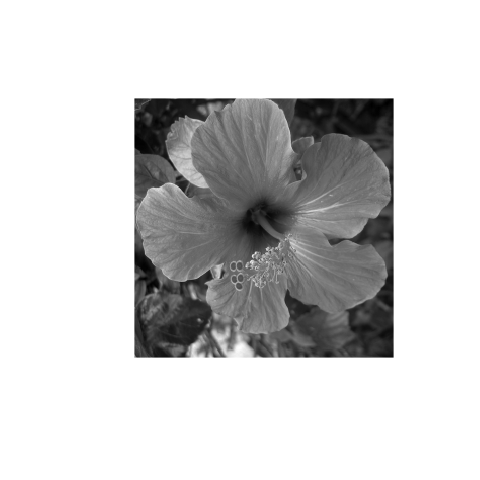

In [2]:
n = 256
name = 'nt_toolbox/data/hibiscus.png'
options(repr.plot.width=4, repr.plot.height=4)
f = load_image(name, n, 1)
imageplot(f)

Les valeurs des pixels sont enregistrées dans [l'ordinateur](http://fr.wikipedia.org/wiki/Ordinateur) ou
[l'appareil photo numérique](http://fr.wikipedia.org/wiki/Appareil_photographique_num%C3%A9rique)
sous forme
de [nombres entiers](http://fr.wikipedia.org/wiki/Entier_relatif) entre 0 et 255,
ce qui fait 256 valeurs possibles pour chaque pixel.

La valeur 0 correspond au noir, et la valeur 255 correspond au blanc. Les
valeurs intermédiaires correspondent à des [niveaux de gris](http://fr.wikipedia.org/wiki/Niveau_de_gris)
allant du noir au blanc.

La figure ci-dessous montre un sous-tableau de $6 \times 6$ pixels extrait de
l'image précédente. On peut voir à la fois les valeurs qui composent le tableau et les niveaux de gris qui permettent d'afficher l'image à l'écran.

In [3]:
selx = c(20:25)
sely = c(63:68)
print(floor(255 * f[selx,sely]))

     [,1] [,2] [,3] [,4] [,5] [,6]
[1,]   47   46   44   43   43   40
[2,]  109   81   57   47   45   44
[3,]  190  191  164  119   75   51
[4,]  160  178  190  178  171  138
[5,]  137  145  152  160  167  165
[6,]  156  151  150  157  147  154


## Stocker une image

Stocker de grandes images sur le [disque dur](http://fr.wikipedia.org/wiki/Disque_dur)
d'un ordinateur prend
beaucoup de place. Les nombres entiers sont stockés
en [écriture binaire](http://fr.wikipedia.org/wiki/Syst%C3%A8me_binaire),
c'est-à-dire sous la forme d'une succession
de 0 et de 1. Chaque 0 et chaque 1 se stocke sur une unité élémentaire
de stockage, appelée [bit](http://fr.wikipedia.org/wiki/Bit).


Pour obtenir l'écriture binaire d'un pixel ayant comme valeur 179,
il faut décomposer cette valeur comme somme de puissances de deux.
On obtient ainsi
$$ 179=2^7+2^5+2^4+2+1, $$
où l'on a pris soin d'ordonner les puissances de deux par ordre
décroissant. Afin de faire mieux apparaître l'écriture binaire,
on ajoute "$1 \times$" devant chaque puissance qui apparaît dans l'écriture,
et "$0\times$" devant les puissances qui n'apparaissent pas
$$ 179=1 \times 2^7 + 0 \times 26 + 1 \times 2^5 + 1 \times 24 +
  0 \times 2^3 + 0 \times 22 + 1 \times 2^1 + 1 \times 2^0. $$


Avec une telle écriture,
la valeur de chaque pixel, qui est un nombre entre 0 et 255, nécessite
$$ \log_2(256) = 8 \text{ bits}. $$
La fonction $\log_2$ est le logarithme en base 2, et ce calcul exprime
le fait que
$$ 256=2^8 = 2 \times 2 \times 2 \times 2 \times 2 \times 2 \times 2 \times 2.  $$
L'écriture binaire de la valeur 179 du pixel est ainsi $(1,0,1,1,0,0,1,1)$,
où chaque 1 et chaque 0 correspond au facteur multiplicatif qui apparaît devant chaque puissance.


On peut écrire toute valeur entre 0 et 255 de cet manière,
ce qui nécessite d'utilisation de 8 bits. Il y a en effet
256 valeurs possibles, et $256=2^8$. Pour stocker l'image complète, on a donc besoin de
$$ n \times p \times 8 \text{ bits}. $$


Pour stocker l'image complète, on a donc besoin de
$$ n \times p \times 8  \text{ bits}. $$
Pour l'image montrée aux figure précédentes, on a ainsi besoin de
$$ 256 \times 256 \times 8 = 524288 \text{ bits}. $$


Pour l'image montrée à la première figure, on a ainsi besoin de
$$ 240 \times 240 \times 8 = 460800 \text{ bits.} $$
On utilise le plus souvent [l'octet](http://fr.wikipedia.org/wiki/Octet) (8 bits) comme unité,
de sorte que cette image nécessite 57,6ko (kilo octets).

## La résolution d'une image

Afin de réduire la place de stockage d'une image, on peut réduire sa
[résolution](http://fr.wikipedia.org/wiki/R%C3%A9solution_(imagerie_num%C3%A9rique)),
c'est-à-dire diminuer le nombre de pixels.


La façon la plus simple d'effectuer cette réduction consiste à supprimer des lignes et des colonnes dans l'image de départ.


La figure suivante montre ce que l'on obtient si l'on retient une ligne sur 4 et une colonne sur 4.

In [4]:
sub = function(f,k){f[seq(1, nrow(f), k), seq(1, ncol(f), k)]}

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

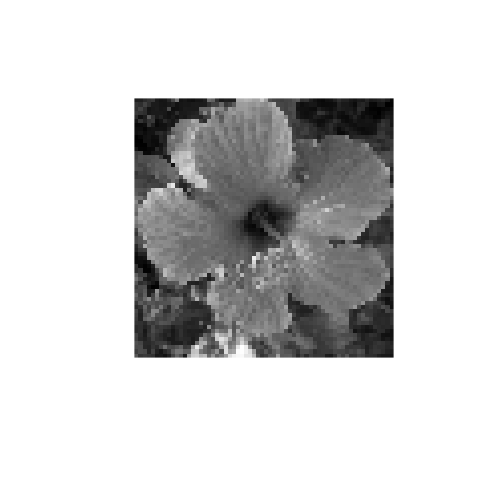

In [5]:
options(repr.plot.width=4, repr.plot.height=4)
imageplot(sub(f[,],4))

On a ainsi divisé par $4 \times 4 = 16$ le nombre de pixels de l'image,
et donc également réduit par 16 le nombre de bit nécessaire pour stocker l'image sur
un disque dur.


La figure suivante montre les résultats obtenus en enlevant de plus en
plus de lignes et de colonnes. Bien entendu, la qualité de l'image se
dégrade vite.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

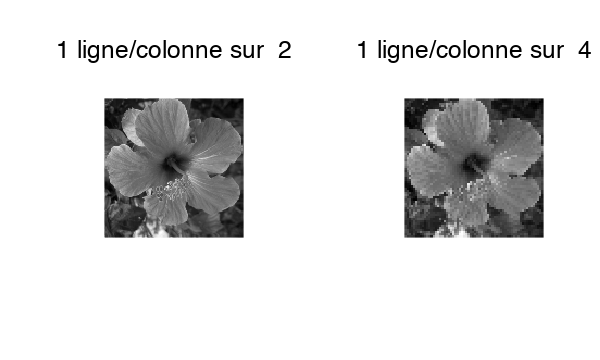

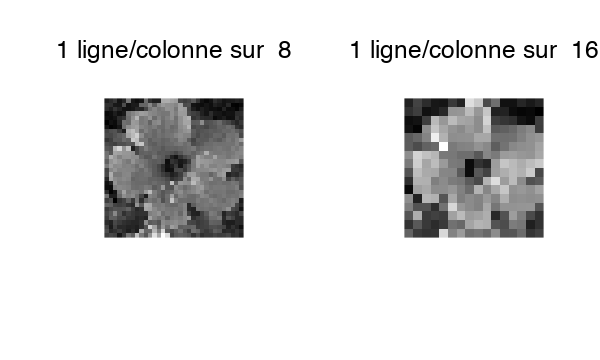

In [6]:
klist = c(2, 4, 8, 16)
for (i in c(1:length(klist)))
    {
    options(repr.plot.width=5, repr.plot.height=3)
    k = klist[i]
    imageplot( sub(f[,], k), paste('1 ligne/colonne sur ', toString(k)), c(1, 2, i)) 
    }

## Quantifier une image

Une autre façon de réduire la place mémoire nécessaire pour le stockage
consiste à utiliser moins de nombres entirers pour chaque valeur.


On peut par exemple utiliser uniquement des nombres entier entre 0 et 3,
ce qui donnera une image avec uniquement 4 niveau de gris.


On peut effectuer une conversion de l'image d'origine vers une image avec
3 niveau de valeurs en effectuant les remplacements:


- les valeurs dans $0,1,\ldots,63$ sont remplacées par la valeur 0,

- les valeurs dans $64,1,\ldots,127$ sont remplacées par la valeur 1,

- les valeurs dans $128,1,\ldots,191$ sont remplacées par la valeur 2,

- les valeurs dans $192,\ldots,255$ sont remplacées par la valeur 3.


Une telle opération se nomme [quantification](http://fr.wikipedia.org/wiki/Quantification_(signal)).


La figure suivante montre l'image résultante avec 4 niveaux de couleurs.
Les 4 valeurs sont affichées en utilisant 4 niveaux de gris allant du noir
au blanc.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

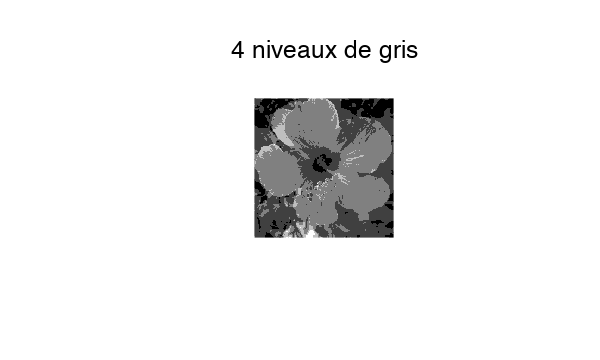

In [7]:
quant = function(f,q){round(q * rescale(f, 1e-3, 1 - 1e-3)) / q}
imageplot(quant(f[,], 4), '4 niveaux de gris')

Nous avons déjà vu que l'on pouvait représenter toute valeur entre 0 et
255 à l'aide de 8 bits en utilisant l'écriture binaire. De façon similaire,
on vérifie que toute valeur entre 0 et 3 peut se représenter à l'aide de 2 bits.
On obtient ainsi une réduction d'un facteur 8/2=4 de la place
[mémoire](http://fr.wikipedia.org/wiki/M%C3%A9moire_(informatique)) nécessaire
pour le stockage de l'image sur un disque dur.


La figure suivante montre les résultats obtenus en utilisant de moins en
moins de niveaux de gris.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

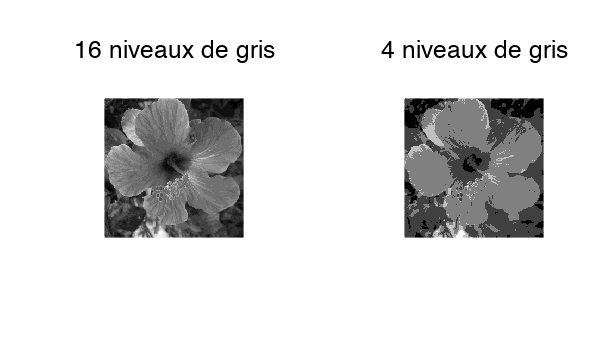

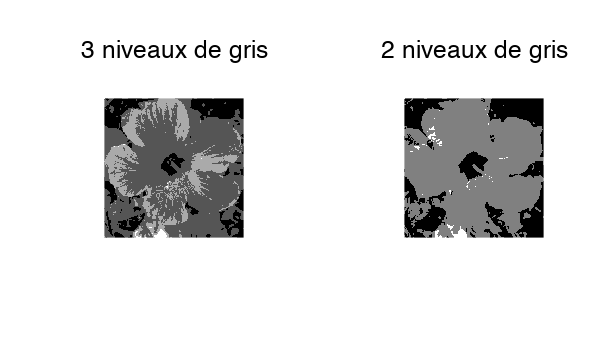

In [8]:
qlist = c(16, 4, 3, 2)
for (i in c(1:length(qlist)))
{
    q = qlist[i]
    f1 = quant(f[,],q)
    f1[0] = 0
    f1[1] = 1
    options(repr.plot.width=5, repr.plot.height=3)
    imageplot(f1[,], paste(toString(q), 'niveaux de gris'), c(1, 2, i))
}

Tout comme pour la réduction du nombre de pixels, la réduction du nombre
de niveaux de gris influe beaucoup sur la qualité de l'image.
Afin de réduire au maximum la taille d'une image sans modifier sa qualité,
on utilise des méthodes plus complexes de
[compression d'image](http://fr.wikipedia.org/wiki/Compression_d%27image). La méthode
la plus efficace s'appelle
[JPEG-2000](http://fr.wikipedia.org/wiki/Jpeg_2000).
Elle utilise la théorie des [ondelettes](http://fr.wikipedia.org/wiki/Ondelettes).
Pour en savoir plus à ce sujet, vous pouvez consuler cet
[article d'Erwan Le
Pennec](http://images.math.cnrs.fr/Compression-d-image.html).

## Enlever le bruit par moyennes locales

Les images sont parfois de mauvaise qualité. Un exemple typique de défaut
est le [bruit](http://fr.wikipedia.org/wiki/Bruit_num%C3%A9rique)
qui apparait quand une photo est
[sous-exposée](http://fr.wikipedia.org/wiki/Exposition_(photographie)), c'est-à-dire
qu'il n'y a pas assez de luminosité. Ce bruit se manifeste par de petites
flucturation [aléatoires](http://fr.wikipedia.org/wiki/Suite_al%C3%A9atoire)
des niveaux de gris. La figure ci-dessous montre
une image bruitée.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

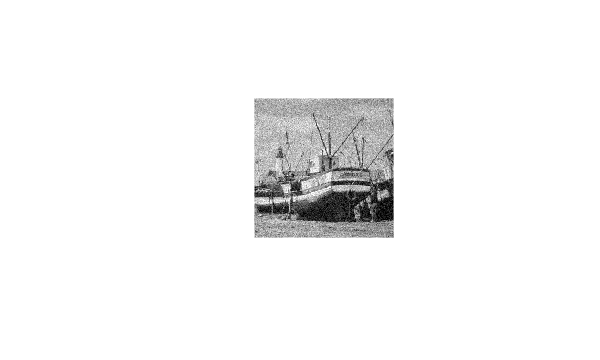

In [9]:
name = 'nt_toolbox/data/boat.png'
f = load_image(name, n)
sigma = .08
f = f[,] + randn(n,n) * sigma
imageplot(clamp(f))

Afin d'enlever le bruit dans les images, il convient de faire subir une
modification aux valeurs de pixels.
L'opération la plus simple consiste à remplacer la valeur
$a$ de chaque pixel par la [moyenne](http://fr.wikipedia.org/wiki/Moyenne) de
$a$ et des 8 valeurs $b,c,d,e,f,g,h,i$ des 8 pixels voisins de a.

Les valeurs des pixels sont positionnées comme suit :
$$
\left[
\begin{array}{ccc}
      g & c & h \\
      b & a & d \\
      f & e & i
\end{array}
\right]
  =
\left[
\begin{array}{ccc}
      79 & 54 & 47 \\
      192 & 190 & 153 \\
      166 & 189 & 203
\end{array}
\right]
$$

On obtient ainsi une image modifiée en remplaçant a par
$$ \frac{a+b+c+d+e+f+g+h+i}{9} $$
puisque l'on fait la moyenne de 9 valeurs.
Dans notre exemple, cette moyenne vaut
$$ \frac{190+192+79+54+47+153+203+189+166}{9} \approx 141,4. $$
En effectuant cette opération pour chaque pixel, on supprime une partie
du bruit, car ce bruit est constitué de fluctuations aléatoires, qui sont
diminuées par un calcul de moyennes. La figure ci-dessous montre l'effet d'un tel calcul.


La figure ci-dessous montre l'effet d'un tel moyennage.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

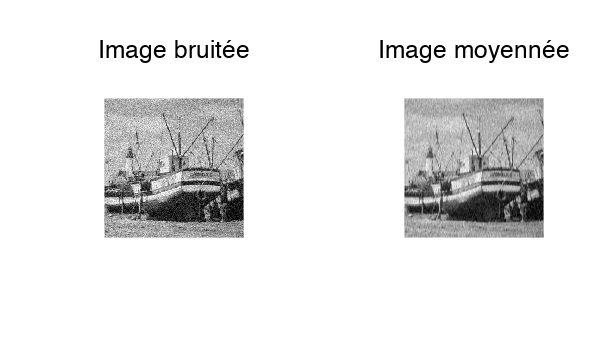

In [10]:
roll2d = function(f,i,j){roll(roll(f,i,axis=0),j,axis=1)}

filt_moy = function(f,k)
{
    n = dim(f)[1]
    g = matrix(0, n,n)
    for (i in c(-k :k))
        {
        for (j in c(-k : k))
            {
                g = g + roll2d(f,i,j)
            }
        }
    return(g/( (2 * k + 1)**2 ))
}
    
imageplot(clamp(f[,]), 'Image bruitée', c(1, 2, 1))
imageplot(clamp(filt_moy(f[,], 1)), 'Image moyennée', c(1, 2, 2))

Tout le bruit n'a pas été enlevé par cette opération. Afin d'enlever plus
de bruit, on peut moyenner plus de valeurs autour de chaque pixel.
La figure suivante montre le résultat obtenu en moyennant de plus en plus
de valeurs.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

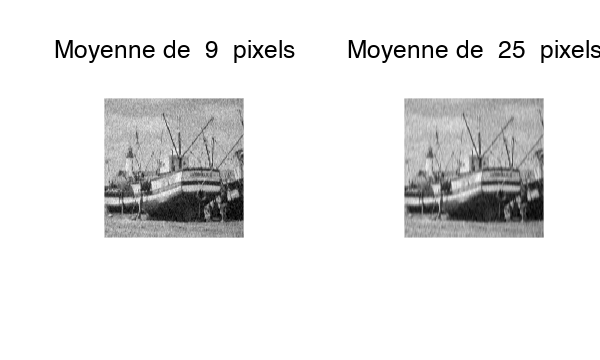

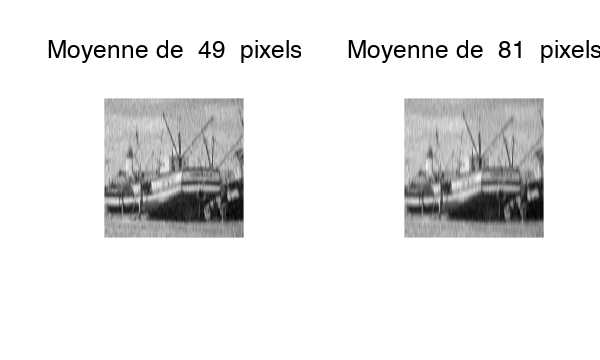

In [11]:
klist = c(1, 2, 3, 4)
for (i in c(1 : length(klist)))
{
    k = klist[i]
    f1 = filt_moy(f,k)
    imageplot(clamp(f1), paste('Moyenne de ', toString((2*k+1)**2), ' pixels'), c(1, 2, i))
}

Le moyennage des pixels est très efficace pour enlever le bruit dans les
images, malheureusement il détruit également une grande partie de
l'information de l'image. on peut en effet s'appercevoir que les images
obtenues par moyennage sont [floues](http://fr.wikipedia.org/wiki/Flou,_nettet%C3%A9_et_contraste). Ceci est en particulier visible près
des contours, qui ne sont pas nets.

## Enlever le bruit par médiane

Afin de réduire ce flou, il faut remplacer le moyennage par une opération
un peu plus complexe, que l'on nomme [mediane](http://fr.wikipedia.org/wiki/M%C3%A9diane).


Etant donné la valeur $a$ d'un pixel, et les valeurs
$b,c,d,e,f,g,h,i$, on commence par les classer
par [croissant](http://fr.wikipedia.org/wiki/Ordre_croissant ordre).


Dans l'exemple du voisinage de 9 pixels utilisé à la section précédente,
on obtient les 9 valeurs classées
$$ 47,54,79,153,166,189,190,192,203. $$
La médiane des neuf valeurs $a,b,c,d,e,f,g,h,i$
est la $5^\text{e}$ valeur de ce classement (c'est-à-dire la
valeur centrale de ce classement).


Dans notre cas, la médiane est donc 166. Notez que ce nombre est en général
différent de la moyenne, qui vaut, pour notre exemple 141,4.


La figure ci-dessous compare le débruitage obtenu en effectuant la
moyenne et la médiane de 9 pixels voisins.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

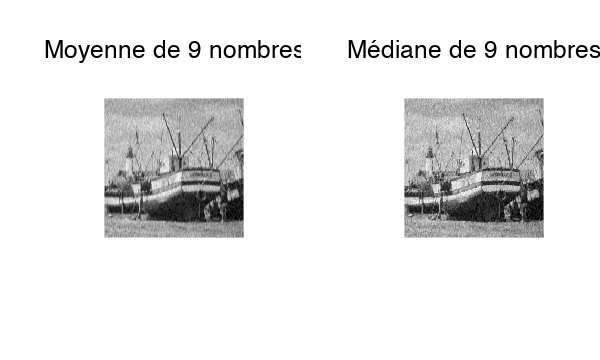

In [12]:
filt_med = function(f,k)
{
    n = dim(f)[1]
    g = array(0, dim=c(n, n, (2 * k + 1)**2))
    s = 1
    for (i in c(-k : k))
    {
        for (j in c(-k : k))
        {
            g[,,s] = roll2d(f, i, j)
            s = s + 1
        }
    }
    return(apply(g, 1:2, median))
}

imageplot(clamp(filt_moy(f[,], 1)), 'Moyenne de 9 nombres', c(1, 2, 1))
imageplot(clamp(filt_med(f[,], 1)), 'Médiane de 9 nombres', c(1, 2, 2))

Afin d'enlever plus de bruit, il suffit de calculer la médiane sur un
nombre plus grand de pixels voisins, comme montré à la figure suivante.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

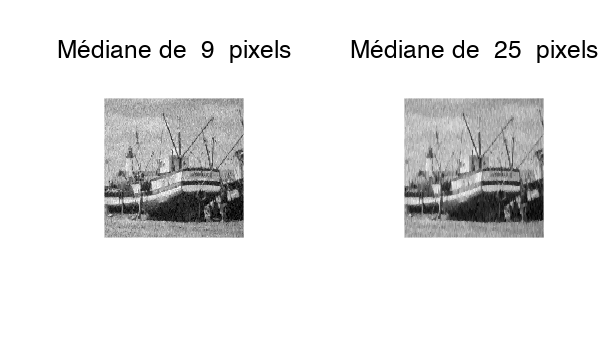

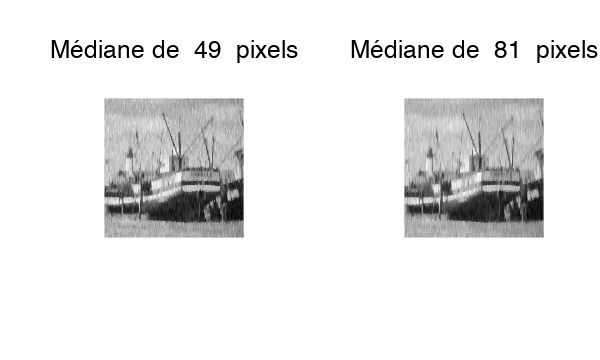

In [13]:
klist = c(1, 2, 3, 4)
for (i in c(1 : length(klist)))
{
    k = klist[i]
    f1 = filt_med(f,k)
    imageplot(clamp(f1), paste('Médiane de ', toString((2*k+1)**2), ' pixels'), c(1, 2, i))
}

On constate que cette méthode est plus performante que le calcul de
moyennes, car les images résultantes sont moins floues. Cependant, tout comme
avec le calcul de moyennes, si l'on prend des voisinages trop grands, on perd
aussi de l'information de l'image, en particulier les bords des objets sont dégradés.

## Détecter les bords des objets

Affin de localiser des objets dans les images, il est nécessaire de
détecter les [bords](http://fr.wikipedia.org/wiki/D%C3%A9tection_de_contours)
de ces objets. Ces bords correspondent à des
zones de l'image où les valeurs des pixels changent rapidement. C'est le
cas par exemple lorsque l'on passe de la coque du bateau (qui est sombre,
donc avec des valeurs petites) à la mer (qui est claire, donc avec des
valeurs grandes).


Afin de quantifier combien un pixel avec une valeur $a$ est un bord,
on prend en compte les valeurs $b,c,d,e$ de ses quatre voisins (deux
horizontallement et deux verticalements). Dans le cas considéré
précédemment, on obtient :
$$
\left[
\begin{array}{ccc}
       & c &  \\
      b & a & d \\
       & e &
\end{array}
\right]
  =
\left[
\begin{array}{ccc}
       & 54 &  \\
      192 & 190 & 153 \\
       & 189 &
\end{array}
\right]
$$


Notons que l'on utilise ici seulement 4 voisins, ce qui est différent du
calcul de moyennes et de médianes où l'on utilisait 8 voisins.
Ceci est important afin de détecter aussi précisément que possible les bords des objets.


On calcule une valeur $\ell$ suivant la formule
$$ \ell = \sqrt{ (b-d)^2 + (c-e)^2 }.  $$
Dans notre exemple, on obtient donc
$$ \ell= \sqrt{ (192 - 153)^2 + (189 - 54)^2 } = \sqrt{19746} \approx 140,5. $$


On peut remarquer que si $\ell=0$, alors on a $b=c$
et $d=e$. Au contraire, si
$\ell$ est grand, ceci signifie que les pixels voisins ont des valeurs très
différentes, le pixel considéré est donc probablement sur le bord d'un objet.


La figure suivante montre l'image obtenue en calculant la valeur $\ell$
associée à chaque pixel. On a affiché ces valeurs avec du noir quand
$\ell=0$,  du blanc quand $\ell$ est grand,
et on a utilisé des niveaux de gris intermédiaire pour les valeurs entre 0 et 1.

In [14]:
n = 256
name = 'nt_toolbox/data/hibiscus.png'
f = load_image(name, n)

In [15]:
edge = function(f){sqrt((roll2d(f,1,0) - roll2d(f, -1,0))**2 + (roll2d(f, 0, 1) - roll2d(f,0, -1))**2)}

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

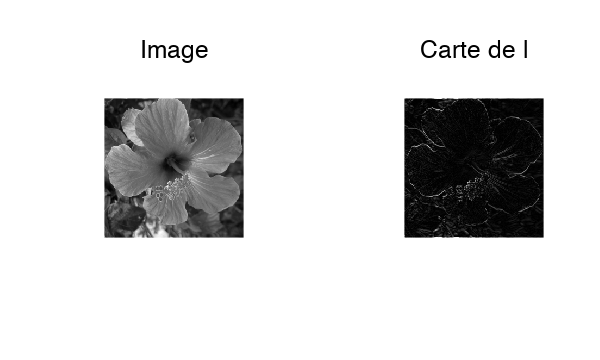

In [16]:
imageplot(f[,], 'Image', c(1, 2, 1))
imageplot(edge(f[,]), 'Carte de l', c(1, 2, 2))

On peut voir que dans l'image de droite, les contours des objets
ressortent en blanc, car ils correspondent aux grandes valeurs de $\ell$.

## Les images couleurs

Une [couleur](http://fr.wikipedia.org/wiki/Couleur image)
est en réalité composée de trois images indépendantes,
afin de représenter le
[rouge, le vert, et le bleu](http://fr.wikipedia.org/wiki/Rouge_vert_bleu).
Chacune de ces trois
image s'appelle un [canal](http://fr.wikipedia.org/wiki/Codage_informatique_des_couleurs).
Cette représentation en rouge, vert et bleu mime le fonctionnement du
système visuel humain.


La figure suivante montre une image couleur, qui est décomposée en ses
trois canaux constitutifs.

In [17]:
name = "nt_toolbox/data/hibiscus.png"
f = load_image(name, flatten=0, grayscale=0)

In [18]:
f1 = f
f1[,,,c(2, 3)] = 0

f2 = f
f2[,,,c(1, 3)] = 0

f3 = f
f3[,,,c(1, 2)] = 0

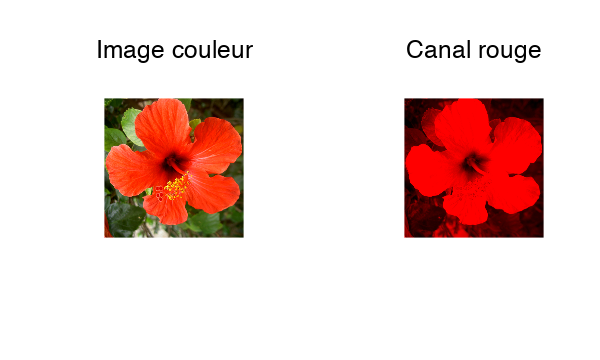

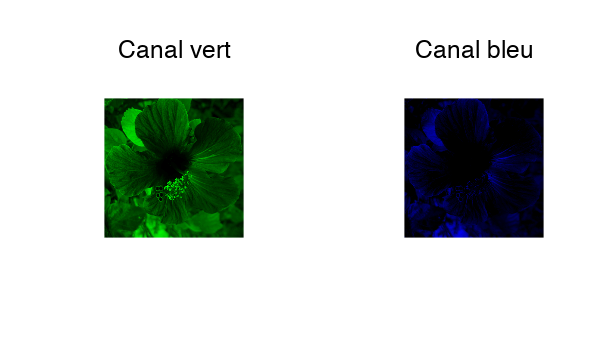

In [19]:
par(mfrow=c(1,2))
imageplot(f, 'Image couleur')
imageplot(f1, 'Canal rouge')
par(mfrow=c(1,2))
imageplot(f2, 'Canal vert')
imageplot(f3, 'Canal bleu')

Chaque pixel de l'image couleur contient ainsi trois nombres $ (r,v,b) $,
chacun étant un nombre entier entre 0 et 255.
Si le pixel est égal à $(r,v,b)=(255,0,0)$, il ne contient que de l'information
rouge, et est affiché comme du rouge.
De façon similaire, les pixels valant $(0,255,0)$ et $(0,0,255)$ sont
respectivement affichés vert et bleu.


On peut afficher à l'écran une image couleur à
partir de ses trois canaux $(r,v,b)$ en utilisant les règles de la
[additive des couleurs](http://fr.wikipedia.org/wiki/Synth%C3%A8se_additive synthèse).
La figure suivante montre les règles de composition
cette synthèse additive des couleurs.
Par exemple un pixel avec les valeurs
$(r,v,b)=(255,0,255)$ est un mélange de rouge et de vert, il est donc
affiché comme du jaune.


On peut calculer une image en niveau de gris à partir d'une image couleur
en moyennant les trois cannaux. On calcule donc une valeur
$$ a = \frac{r+v+b}{3} $$
qui s'appelle la [luminance](http://fr.wikipedia.org/wiki/Luminance) de la couleur.


La figure suivante montre le passage d'une image couleur à une image de luminance en
niveau de gris.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

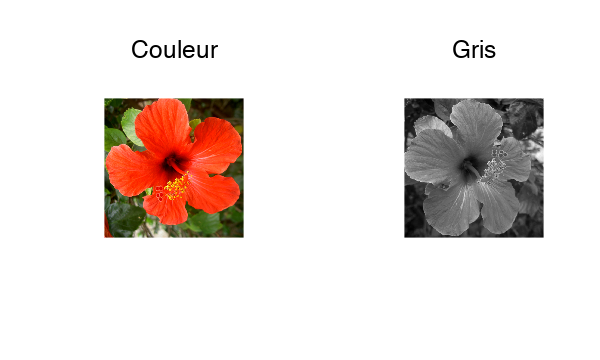

In [20]:
par(mfrow=c(1,2))
imageplot(f, 'Couleur')
imageplot(apply(f,1:2, sum), "Gris")

Une autre représentation courante pour les images couleurs utilise
comme couleurs de base le cyan, le magenta et le jaune. On calcule
les trois nombres $(c,m,j)$ correspondant à chacun de ces trois canaux à
partir des canaux rouge, vert et bleu $(r,v,b)$ comme suit
$$ c=255-r, \quad m=255-v, \quad j=255-b. $$
Par exemple, un pixel de bleu pur
$(r,v,b)=(0,0,255)$ va devenir
$ (c,m,j)=(255,255,0) $. La figure suivante montre les trois canaux
$(c,m,j)$ d'une image couleur.

In [21]:
f1 = f
f1[,,,c(2, 3)] = 0

f2 = f
f2[,,,c(1, 3)] = 1

f3 = f
f3[,,,c(1, 2)] = 1

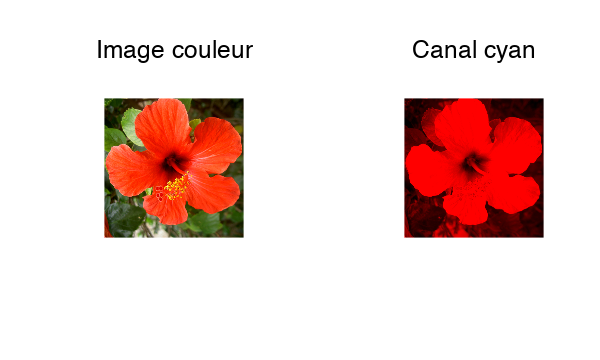

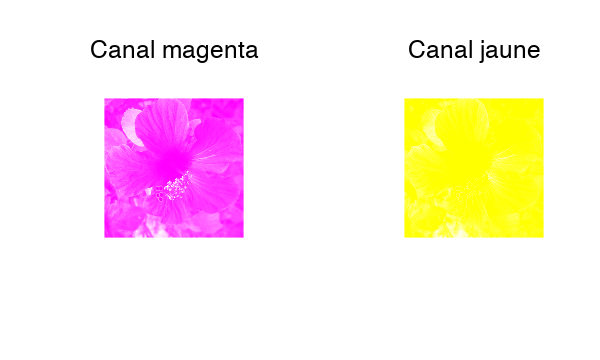

In [22]:
par(mfrow=c(1,2))
imageplot(f, 'Image couleur')
imageplot(f1, 'Canal cyan')
par(mfrow=c(1,2))
imageplot(f2, 'Canal magenta')
imageplot(f3, 'Canal jaune')

Afin d'afficher une image couleur à l'écran à partir des trois canaux
$(c,m,j)$, on doit utiliser la synthèse soustractive des
couleurs. La figure suivante montre les règles de composition
cette synthèse soustractive. Notons que ces règles sont celles que
l'on utilise en peinture, lorsque l'on mélange des pigments colorés. Le cyan,
le magenta et le jaune sont appelés couleurs primaires.



On peut donc stocker sur un disque dur une image couleur en stockant les
trois canaux, correspondant aux valeurs $(r,g,b)$ ou $(c,m,j)$.
On peut modifier les images couleur tout comme les images en niveaux de
gris. La façon la plus simple de procéder consiste à appliquer la modification
à chacun des canaux.

## Changer le contraste d'une image

Il est possible de faire subir différentes modifications à l'image afin de
changer son [contraste](http://fr.wikipedia.org/wiki/Contraste).

In [23]:
name = 'nt_toolbox/data/hibiscus.png'
f = load_image(name, n)

Un exemple simple consiste à remplacer chaque valeur $a$ d'un pixel
d'une image par $255-a$ ce qui correspond à la couleur opposée. Le blanc
devient noir et vice-et-versa, ce qui donne un effet similaire à celui
des [négatifs](http://fr.wikipedia.org/wiki/Film_n%C3%A9gatif)
[d'appareils photos argentiques](http://fr.wikipedia.org/wiki/Argentique).

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

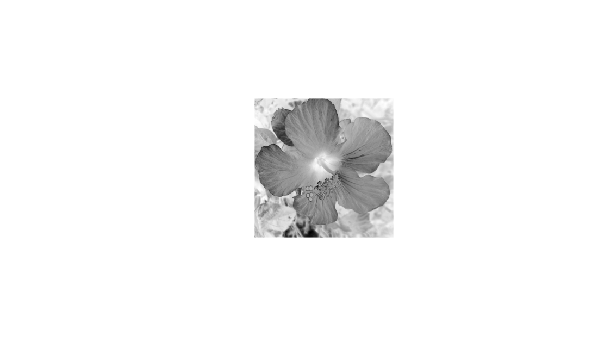

In [24]:
imageplot(-f)

Sans aller jusqu'à des modifications aussi extrêmes, on peut assombrir une image
en rempl\c{c}ant la valeur $a$ de chaque pixel par son
[carré](http://fr.wikipedia.org/wiki/Carr%C3%A9_(alg%C3%A8bre)) $a^2 = a \times a$.


Ce faisant, les valeurs résultantes ne sont
plus dans $0,\ldots,255$ mais dans $0,\ldots,255^2=65025$. Afin
d'afficher l'image à l'écran on va donc utiliser des niveaux de gris
allant du noir pour 0 au blanc pour 65025.

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

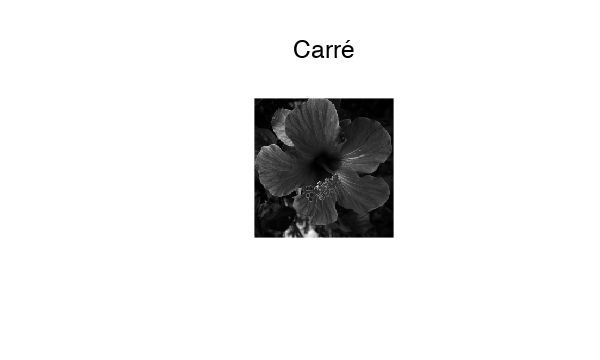

In [25]:
imageplot(f**2, 'Carré')

Afin d'éclaircir l'image, on peut remplacer chaque valeur $a$ par
sa _racine carrée_ $b = \sqrt{a}$. Cette valeur $b$ est un nombre, qui n'est plus
nécessairement entier, qui satisfait $b \times b = a$.


La figure suivante montre l'éclaircissement obtenu.
Les valeurs de l'image éclaircie sont dant
$0,\ldots,\sqrt{255} \approx 16$, et on utilise donc des niveaux
de gris allant du noir (pour 0) au blanc (pour 16).

Warning message in as.raster.cimg(im, rescale = rescale, colorscale = colorscale, :
“You've specified a colour scale, but rescale is set to TRUE. You may get unexpected results”

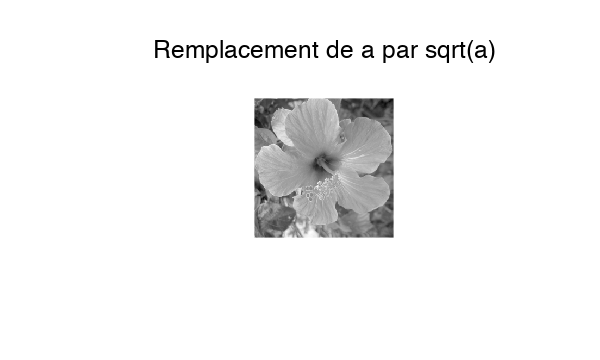

In [26]:
imageplot(sqrt(f), 'Remplacement de a par sqrt(a)')

On pourra noter que l'on a
$$ \sqrt{a} \times \sqrt{a} = a
\quad\text{et}\quad \sqrt{a \times a}=a $$
de sorte que si l'on réalise un éclairsissement suivit d'un
assombrissement (ou dans le sens inverse) on retrouve l'image d'origine.
Ces deux opérations sont
[inverses](http://fr.wikipedia.org/wiki/Inverse) l'une de l'autre.


On peut également changer le contraste d'une image couleur en changeant sa
composante de luminance.

In [27]:
name = 'nt_toolbox/data/hibiscus.png'
f = load_image(name, n, 0, 1)

In [61]:
m = function(f)
    {
        m = array(0, dim=dim(f))
        for (i in 1:dim(m)[4])
        {
            m[,,1,i] = apply(f, 1:2, mean)
        }
        return(m)
    }
contrast = function(f,gamma){clamp(m(f) ** gamma + f - m(f))}

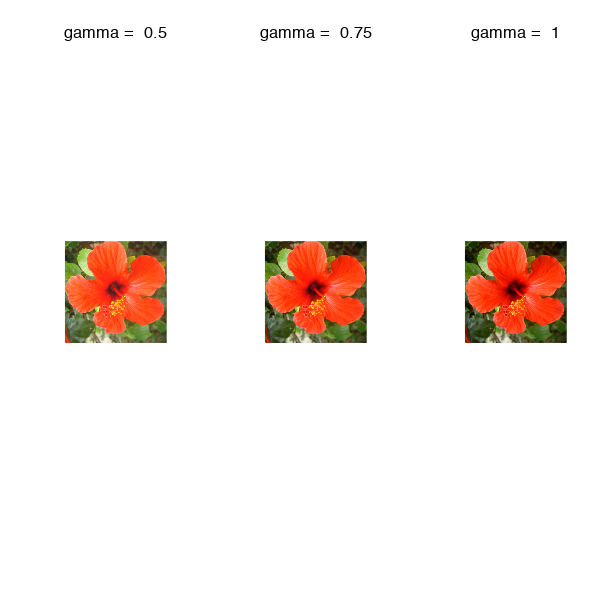

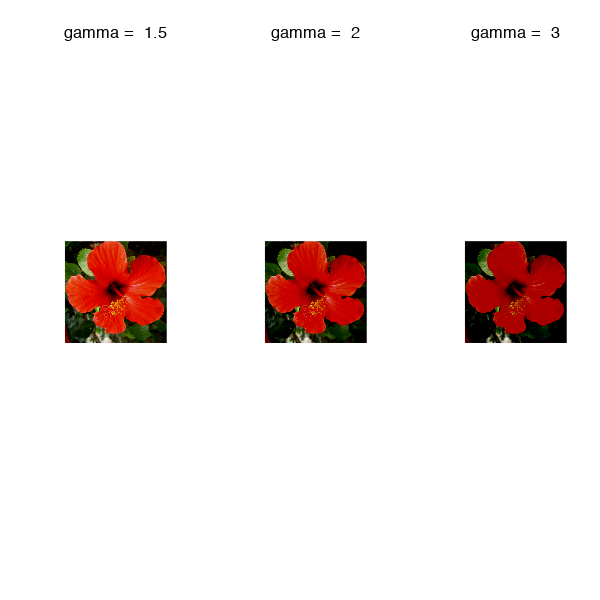

In [92]:
gamma_list = c(.5, .75, 1, 1.5, 2, 3)
options(repr.plot.width=5, repr.plot.height=5)
for (i in 1:length(gamma_list))
{
    if (i %% 3 == 1)
        {
            par(mfrow=c(1,3))
        }
    gamma = gamma_list[i]
    title = paste('gamma = ', toString(gamma))
    imageplot(contrast(f, gamma), title)   
}

## Transformations géométriques

Une image est un tableau de nombres, avec $n$ lignes et $p$
colonnes. Il est donc facile d'effectuer
certaines [transformations géométriques](http://fr.wikipedia.org/wiki/Transformation_g%C3%A9om%C3%A9trique)
sur l'image.


Les valeurs des pixels qui composent ce tableau (noté $A$) peuvent être
représentées sous la forme $ A = ( a_{i,j} )_{i,j} $
ou l'index $i$ décrit l'ensemble des nombres $ \{1,\ldots,n\} $
(les entiers entre 1 et n) et l'index
$j$ les nombres $ \{1,\ldots,p\} $.
One dit que $a_{i,j}$ est la valeur du pixel à la position $(i,j)$.


Le tableau de pixels ainsi indexé peut se représenter sous la fa\c{c}on
suivante
$$
A =
\begin{pmatrix}
a_{1,1} &           &           &   & a_{1,p}\\
       &           &  \vdots   &   &  \\
	   &           & a_{i-1,j} &   & \\
\ldots & a_{i,j-1} & a_{i,j}   & a_{i,j+1} & \ldots\\
	   &           & a_{i+1,j} &   & \\
       &           &  \vdots   &   &  \\
a_{n,1} &           &           &   & a_{n,p}\\
\end{pmatrix}
$$
ce qui montre que le pixel en haut à gauche de l'image correspond à la
valeur $a_{1,1}$. Ceci correspond à la représentation de l'image sous
forme d'une [matrice](http://fr.wikipedia.org/wiki/Matrice_(math%C3%A9matiques)).


Si l'on échange le rôle des lignes et des colonnes, on définit un autre
tableau $B$ avec $p$ lignes et $n$ colonnes. La formule qui définit
le tableau $B = ( b_{j,i} )_{i,j}$ est
$$ b_{j,i} = a_{i,j}. $$
Ceci correspond à la [transposition](http://fr.wikipedia.org/wiki/Matrice_transpos%C3%A9e) de la matrice correspondant à l'image.


Pour une image couleur, on effectue cette modification sur chacune de ses
trois composantes couleur R, V et B.


La figure suivante montre l'image correspondant au tableau $A$ et
l'image correspondant au tableau $B$. On peut constater que la
modification correspond à faire sur l'image une
[symétrie](http://fr.wikipedia.org/wiki/Sym%C3%A9trie_(transformation_g%C3%A9om%C3%A9trique)) par rapport à
la [diagonale](http://fr.wikipedia.org/wiki/Diagonale)
qui joint le coin haut/gauche au coin bas/droite.

Warning message in readfun(f, ...):
“libpng warning: iCCP: known incorrect sRGB profile”

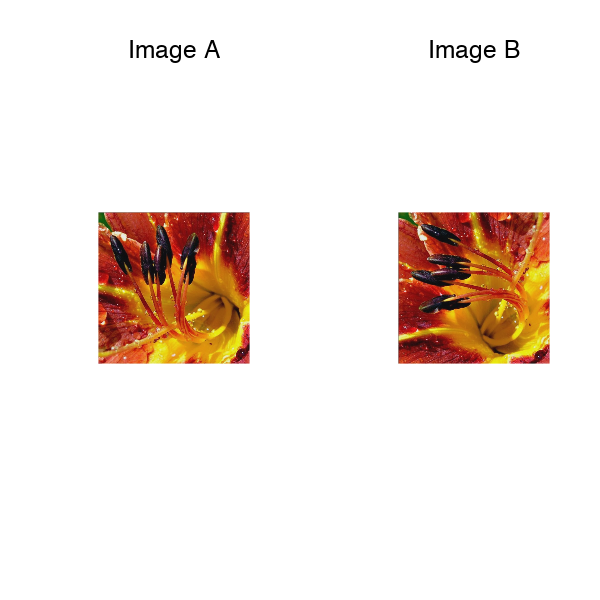

In [108]:
name = 'nt_toolbox/data/flowers.png'
n = 512
options(repr.plot.width=5, repr.plot.height=5)
A = load_image(name, n, 0, 1)
B = A
B[,,,1] = t(A[,,1,1])
B[,,,2] = t(A[,,1,2])
B[,,,3] = t(A[,,1,3])
par(mfrow=c(1,2))
imageplot(A, 'Image A', c(1,2,1))
imageplot(B, 'Image B', c(1,2,2))

On peut également effectuer une [rotation](http://fr.wikipedia.org/wiki/Rotation)
d'un quart de tour dans le sens d'une montre à
l'image. Ceci est effectué en définissant une image $C = (c_{i,j})_{j,i}$ de
$p$ lignes et $n$
colonnes dont le tableau
de nombre est calculé par
$$ c_{j,i} =  a_{n-i+1,j}.$$

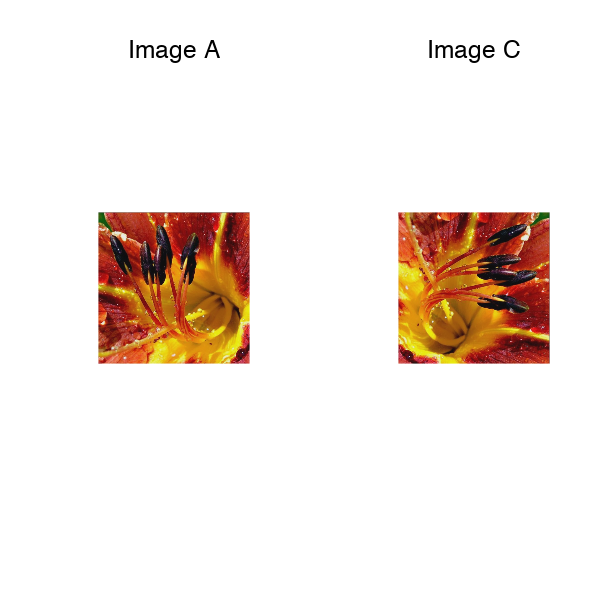

In [152]:
C = A
C[,,,] = C[,dim(A)[1]:1,,]
#C[,,,1] = t(C[,,,1])
#C[,,,2] = t(C[,,1,2])
#C[,,,3] = t(C[,,1,3])
C = as.cimg(aperm(C, c(2, 1, 3, 4)))
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(1,2))
imageplot(A, 'Image A')
imageplot(C, 'Image C')

## Fondu entres deux images

On souhaite effectuer une [transition entre deux images](http://fr.wikipedia.org/wiki/Fondu)
$A$ et $B$ de même
taille. On suppose donc que chaque image a le même nombre $n$ de lignes
et le même nombre $p$ de colonnes.


La figure ci-dessous montre les deux images entre lesquelles on souhaite
calculer une transition.

Warning message in readfun(f, ...):
“libpng warning: iCCP: known incorrect sRGB profile”

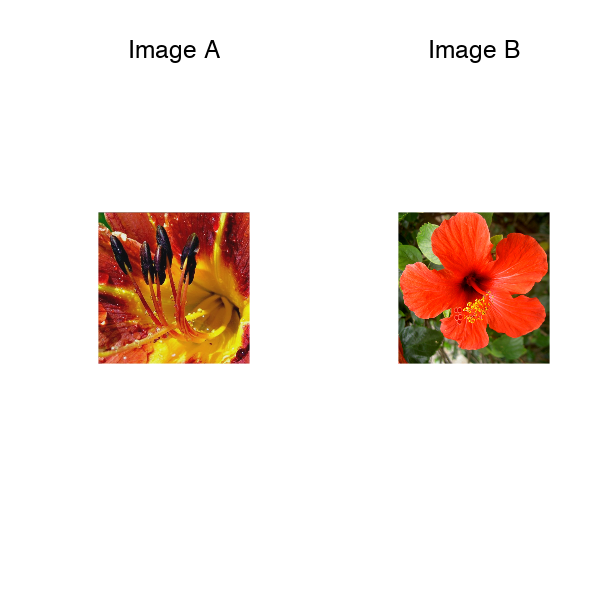

In [153]:
name1 = 'nt_toolbox/data/flowers.png'
name2 = 'nt_toolbox/data/hibiscus.png'
n = 512
A = load_image(name1, n, 0, 1)
B = load_image(name2, n, 0, 1)
par(mfrow=c(1,2))
imageplot(A, 'Image A')
imageplot(B, 'Image B')

One note $A = (a_{i,j})_{i,j}$ les pixels de l'image $A$ et
$B = (b_{i,j})_{i,j}$ les pixels de l'image $B$.


Pour une valeur $t$ fixée entre $0$ et $1$, on définit l'image
$C = (c_{i,j})_{i,j}$ comme
$$ c_{i,j}  = (1-t) a_{i,j} + t b_{i,j}.$$
Il s'agit de la formule d'une
[interpolation linéaire](http://fr.wikipedia.org/wiki/Interpolation_lin%C3%A9aire)
entre les deux images.


Si l'image est une image couleur, on applique cette formule à chacun des
canaux R, V et B.


On peut constater que pour $t=0$, l'image $C$ est égale à l'image
$A$. Pour $t=1$, l'image $c$ est égale à l'image
$B$. Lorsque la valeur $t$ progresse de 0 à 1, on obtient ainsi un
effet de fondu, puisque l'image, qui au départ est proche de l'image $A$
ressemble de plus en plus à l'image $B$.


La figure suivante montre 5 valeurs de $t$ réparties entre 0 et 1.

Warning message in as.cimg.array(B[, , , 1:3]):
“Assuming third dimension corresponds to colour”Warning message in as.cimg.array(B[, , , 1:3]):
“Assuming third dimension corresponds to colour”Warning message in as.cimg.array(B[, , , 1:3]):
“Assuming third dimension corresponds to colour”Warning message in as.cimg.array(B[, , , 1:3]):
“Assuming third dimension corresponds to colour”Warning message in as.cimg.array(B[, , , 1:3]):
“Assuming third dimension corresponds to colour”Warning message in as.cimg.array(B[, , , 1:3]):
“Assuming third dimension corresponds to colour”

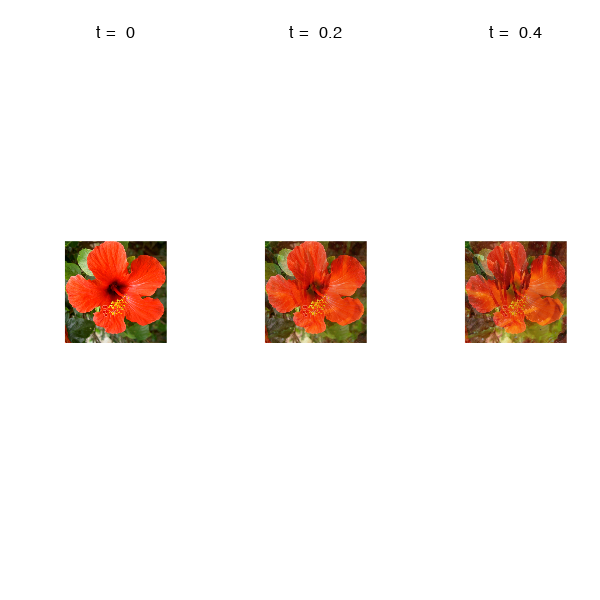

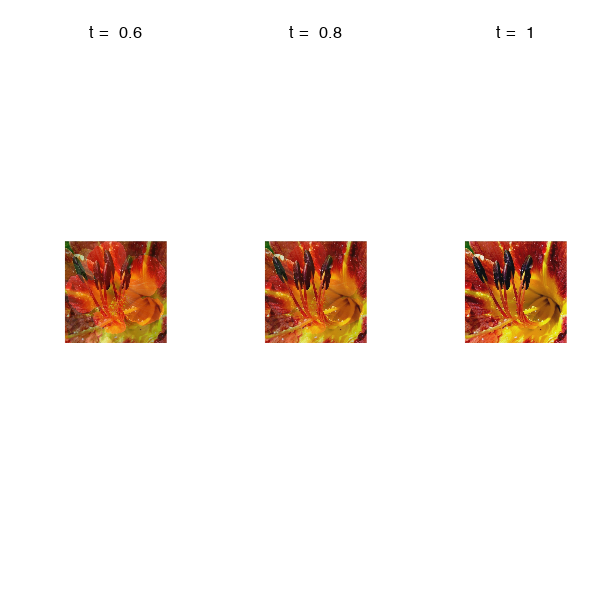

In [154]:
p = 6
t = linspace(0, 1, p)
for (i in c(1:p))
    {
        if (i %% 3 == 1)
        {
            par(mfrow=c(1,3))
        }
        title = paste('t = ', toString(t[i]))
        imageplot(t[i] * A + (1 - t[i]) * as.cimg(B[,,,1:3]), title, c(2, p/2, i))
    }

## Conclusion

Cet article n'a fait qu'effleurer l'immense liste des traitements que l'on
peut faire subir à une image. Le traitement mathématique des images est un domaine
très actif, où les avancées théoriques se concrétisent sous la forme d'algorithmes
rapides de calcul qui ont des applications importantes pour la manipulation des contenus
numériques.


Les personnes intéressées pourront consulter le site web
[A Numerical Tour of Signal Processing](http://www.numerical-tours.com/)
pour de nombreux exemples de traitements d'images. On y
trouve également des liens vers d'autres ressources disponibles en ligne.

## Glossaire

- *Aléatoire* : valeur imprévisible souvent due au hazard, comme par exemple le bruit qui perturbe les images de mauvaises qualités.

- *Bit* : unité élementaire de stockage de l'information sous forme de 0 et de 1 dans un ordinateur.

- *Canal* : une des trois images élémentaires qui composent une image couleur.

- *Bords* : zone d'une image où les valeurs des pixels varient beaucoup, qui correspond aux contours des objets qui forment l'image.

- *Bruit* : petites perturbations qui dégradent la qualité d'une image.

- *Carré* : le carré $b$ d'une valeur $a$ est $a \times a$. Il est noté $a^2$.

- *Contraste* : quantité informelle qui indique la différence entre les zones claires et les zones sombres d'une image.

- *Compression d'image* : méthode permettant de réduire la place mémoire nécessaire au stockage sur le disque dur d'une image.

- *Ecriture binaire* : écriture de valeurs numériques à l'aide uniquement de 0 et de 1.

- *Flou* : dégradation d'une image qui rend les contours des objets peu net, et donc difficile à localiser précisément.

- *Fondu* : interpolation linéaire entre deux images.

- *Image couleur* : ensemble de trois images en niveau de gris, qui peut être affiché à l'écran en couleur.

- *Image numérique* : tableau de valeurs que l'on peut afficher à l'écran en assignant un niveau de gris à chaque valeur.

- *Inverse* : opération ramenant une image dans son état d'origine.

- *JPEG-2000* : méthode récente de compression d'images qui utilise une transformation en ondelettes.

- *Luminance* : moyenne des différents canaux d'une image, qui indique la puissance lumineuse du pixel.

- *Matrice* : tableau de valeurs, représenté sous la forme $(a_{i,j})_{i,j}$.

- *Médiane* : valeur centrale lorsque l'on classe par ordre croissant un ensemble de valeurs.

- *Moyenne* : la moyenne d'un ensemble de valeurs est leur somme divisée par leur nombre.

- *Niveaux de gris* : nuances de gris utilisées pour afficher à l'écran une image numérique.

- *Nombres entiers* : nombres 0, 1, 2, 3, 4 ...

- *Octet* : ensemble de huit bits consécutifs.

- *Ondelettes* : transformation de l'image qui est utilisée par la méthode JPEG-2000 de compression d'images.

- *Ordre croissant* : classement d'un ensemble de valeurs de la plus petite à la plus grande.

- *Pixel* : une case dans un tableau de valeurs correspondant à une image numérique.

- *Quantification* : procédé consistant à réduire l'ensemble des valeurs possibles d'une image numérique.

- *Racine carrée* : la racine carrée $b$ d'une valeur positive $a$ est la valeur positive $b$ vérifiant $a=b \times b$. On la note $\sqrt{a}$.

- *Résolution* : taille d'une image (nombre de pixels).

- *Sous-exposée* : photographie d'une scène trop sombre pour laquelle l'objectif photographique n'est pas resté assez longtemps ouvert.

- *Synthèse additive* : règle permettant de construire une couleur quelconque à partir des trois couleurs rouge, vert et bleu. C'est la règle qui régit le mélange des couleurs de faisceaux lumineux utilisés pour l'éclairage d'un mur blanc.

- *Synthèse soustractive* : règle permettant de construire une couleur quelconque à partir des trois couleurs cyan, magenta et jaune. C'est la règle qui régit le mélange des couleurs en peinture.